# Scenario analysis

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
from plotter import HydroModelPlotter

Read the results of the open exploration:

In [3]:
experiments = pd.read_csv("../outputs/experiments_exploration.csv").drop(columns="Unnamed: 0")
outcomes = pd.read_csv("../outputs/outcomes_exploration.csv").drop(columns="Unnamed: 0")

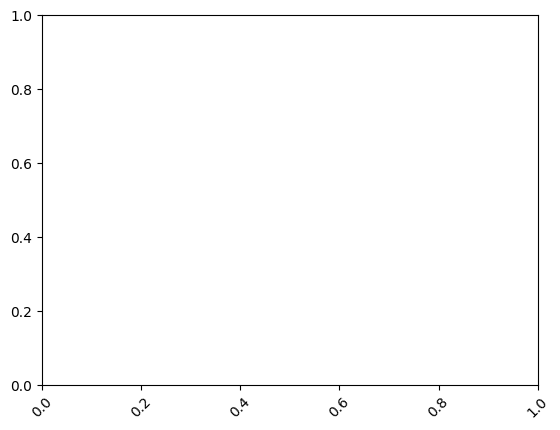

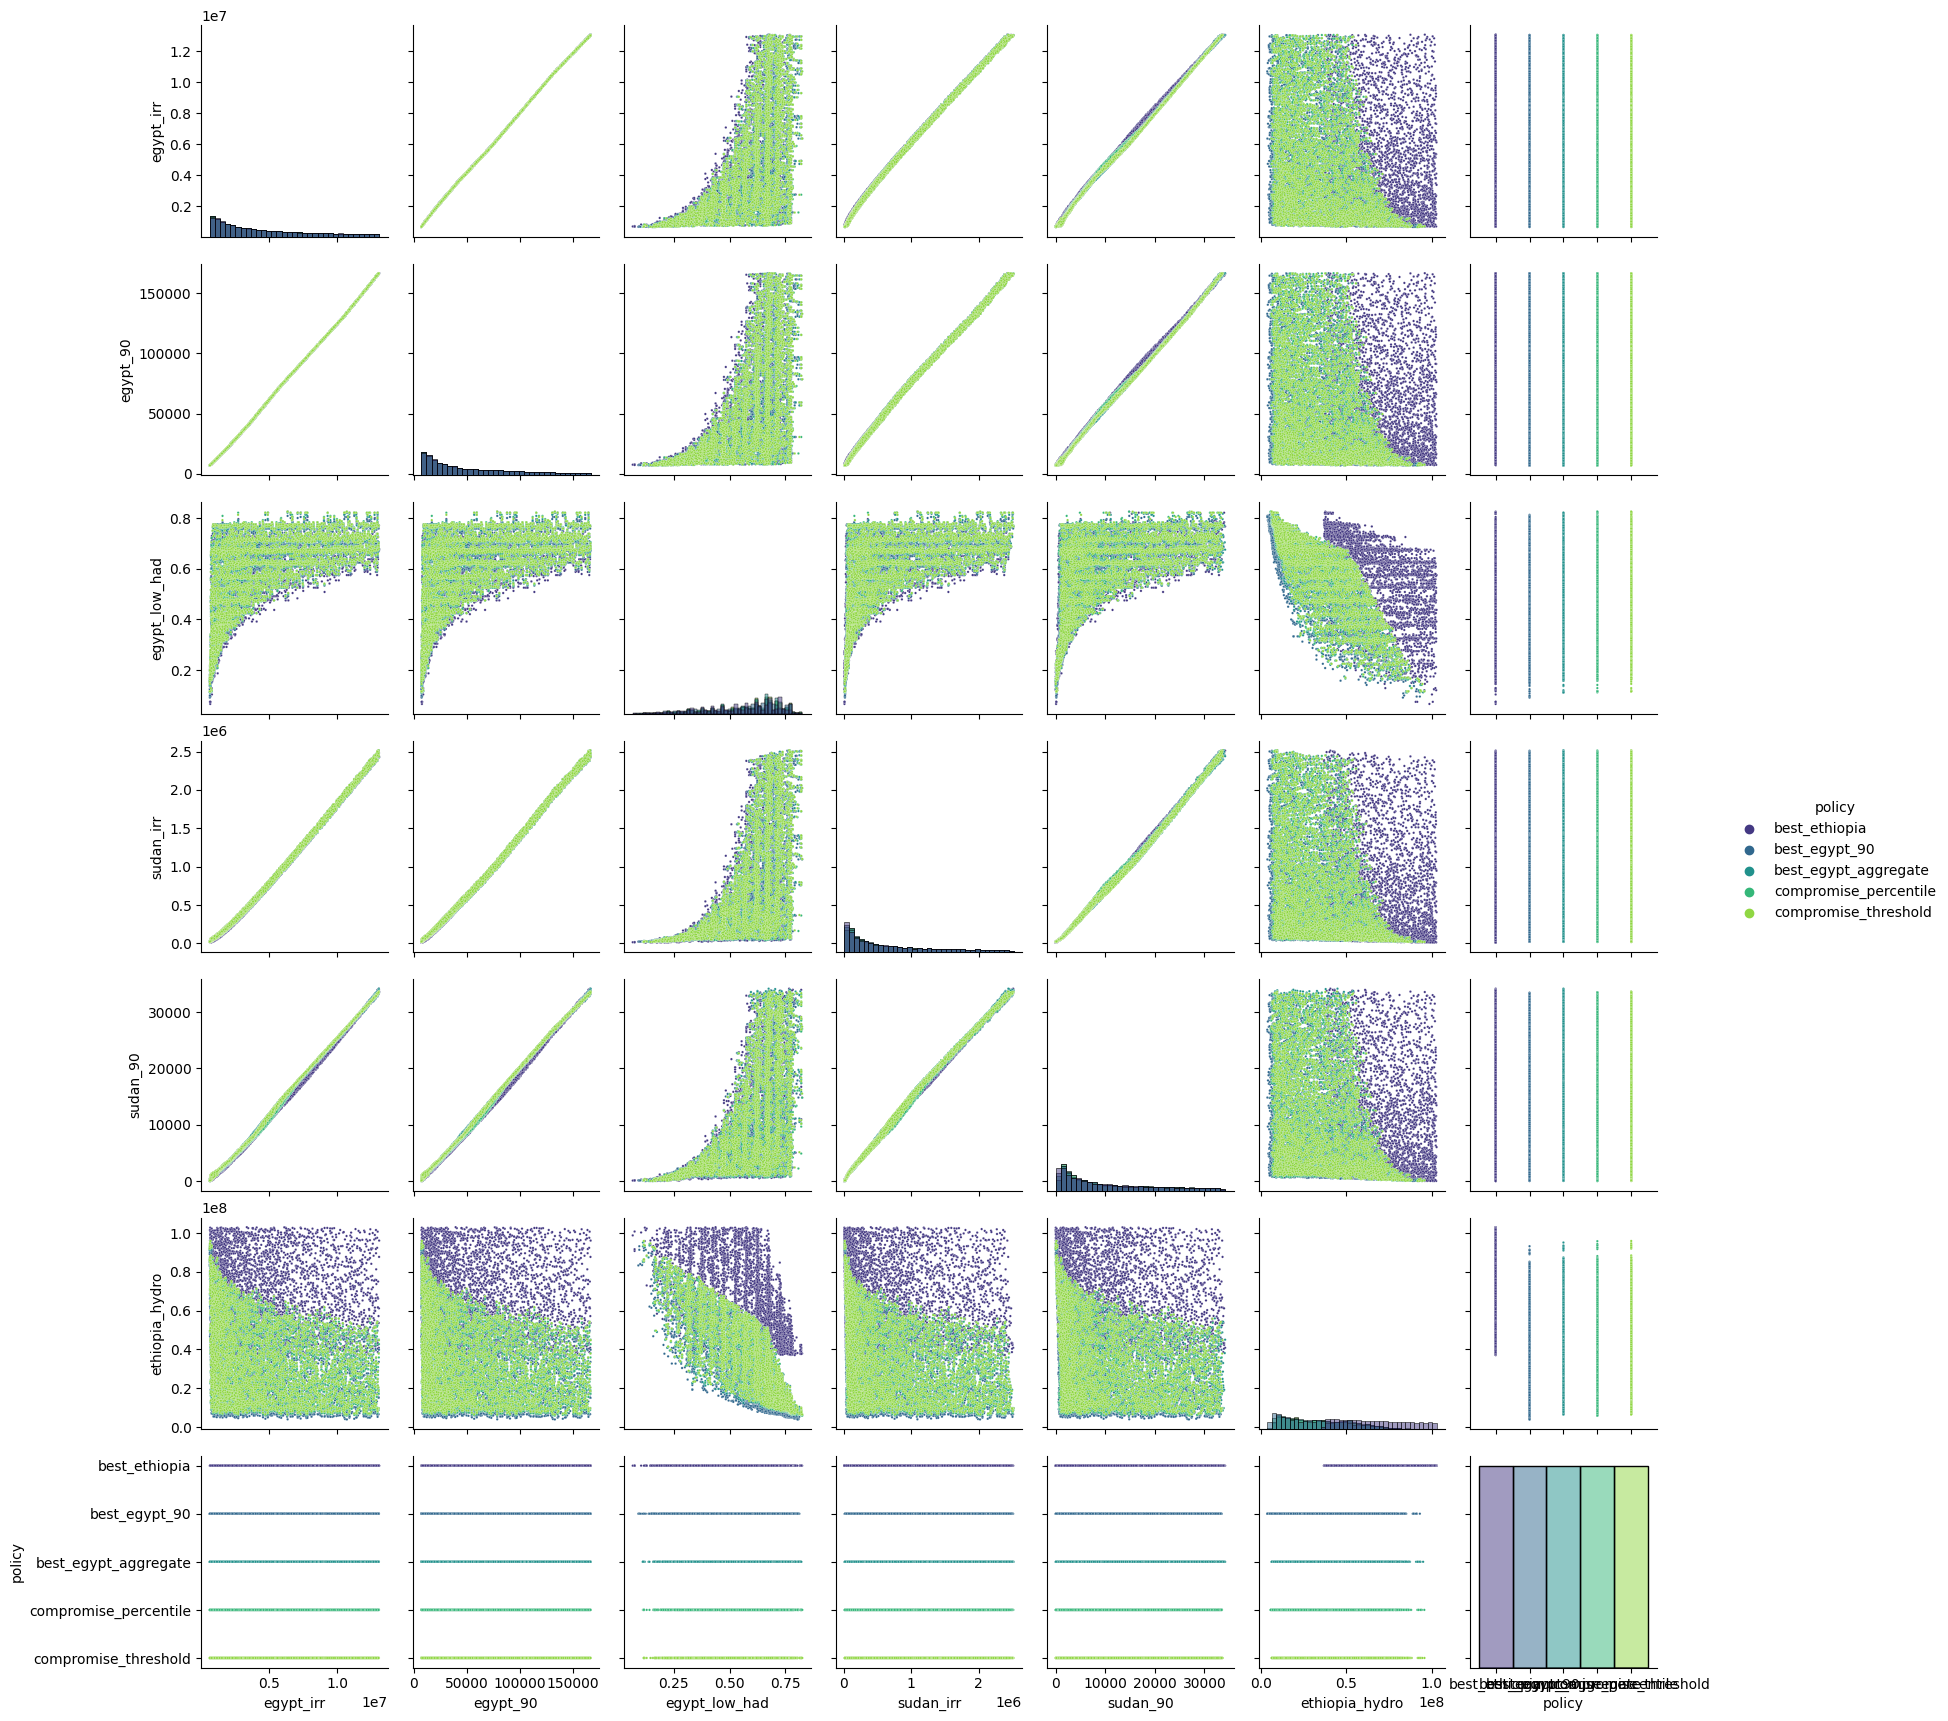

In [19]:
policies = experiments['policy']

data = outcomes
data['policy'] = policies

sns.pairplot(data, hue='policy', vars=outcomes.keys(), diag_kind='hist',plot_kws={"s": 3},palette="viridis")
plt.xticks(rotation=45)
plt.show()


In [5]:
experiments.iloc[:,:7]

,atbara_dev_coef,atbara_mean_coef,blue_nile_dev_coef,blue_nile_mean_coef,white_nile_dev_coef,white_nile_mean_coef,yearly_demand_growth_rate
0,0.924613,0.770501,1.233003,0.851629,1.274855,0.878784,0.114145
1,0.522798,0.800467,1.268223,0.772944,0.647722,1.119952,0.160117
2,1.310227,0.830757,0.708869,0.833031,0.849110,0.816960,0.146758
3,1.410414,0.946410,1.041169,1.008590,1.185570,1.211279,0.288502
4,0.685441,0.844984,1.169591,1.032679,1.252365,0.932387,0.102823
...,...,...,...,...,...,...,...
19995,1.008064,1.168109,0.794362,0.890807,1.343172,0.822178,0.292369
19996,0.556332,0.757609,0.837042,0.845898,1.052426,1.240693,0.282944
19997,1.306031,1.108913,0.559948,1.070927,1.040238,0.931609,0.128133
19998,0.724003,0.798594,1.007108,1.049778,1.499138,0.788226,0.151833


In [6]:
from ema_workbench.analysis import dimensional_stacking

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ema_workbench/analysis/dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


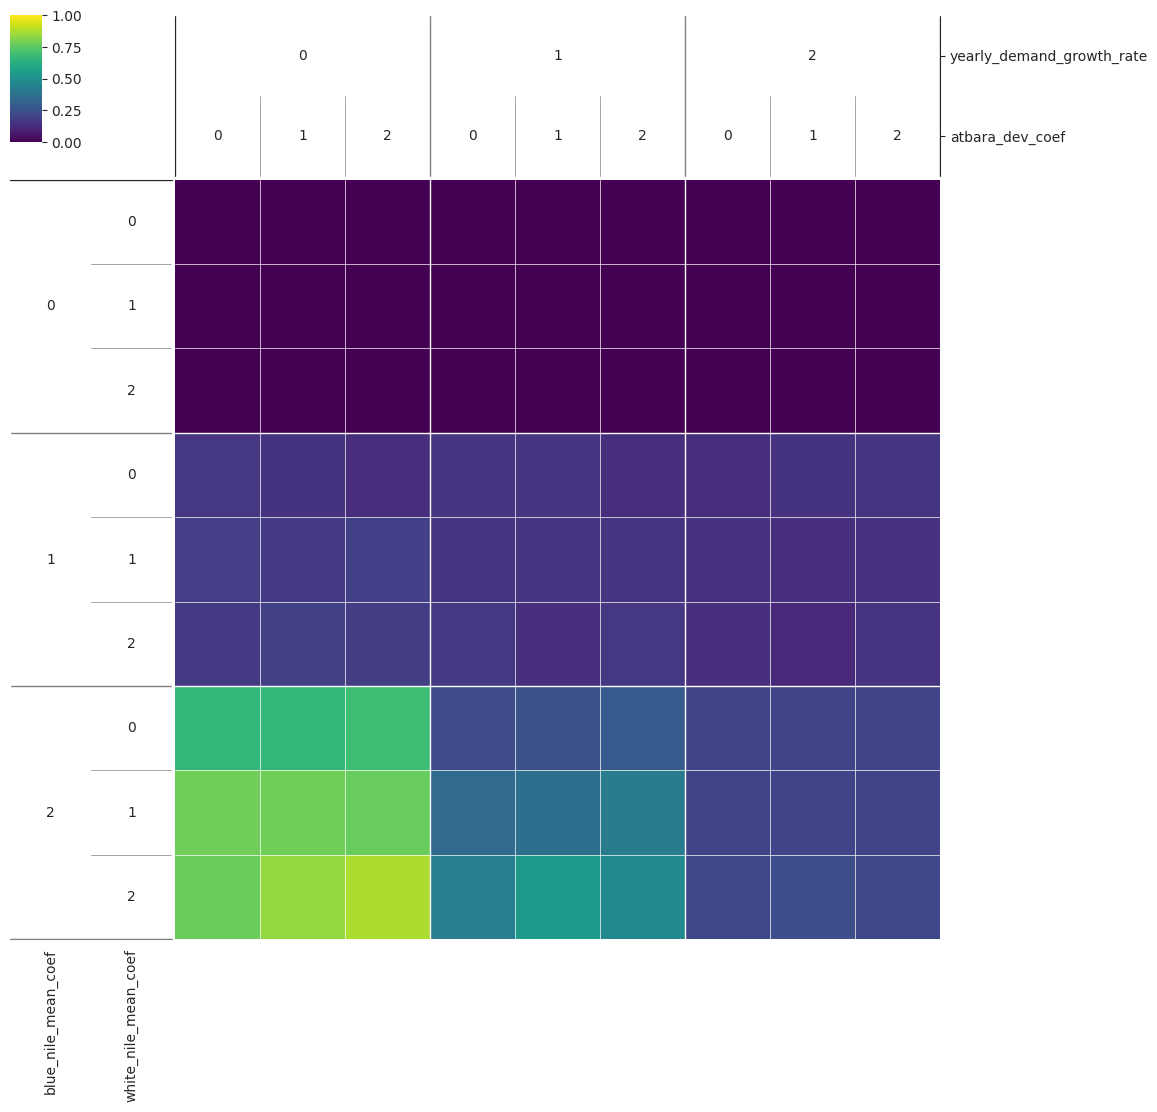

In [22]:
# from ema_workbench.analysis import dimensional_stacking

x = experiments.iloc[:,:7]
y = outcomes["ethiopia_hydro"] > np.percentile(outcomes["ethiopia_hydro"],80)
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3, fsize=(12,12))
plt.show()

In [25]:
experiments.iloc[:,[0,1,2,3,4,5,6,-2]]

,atbara_dev_coef,atbara_mean_coef,blue_nile_dev_coef,blue_nile_mean_coef,white_nile_dev_coef,white_nile_mean_coef,yearly_demand_growth_rate,policy
0,0.924613,0.770501,1.233003,0.851629,1.274855,0.878784,0.114145,best_ethiopia
1,0.522798,0.800467,1.268223,0.772944,0.647722,1.119952,0.160117,best_ethiopia
2,1.310227,0.830757,0.708869,0.833031,0.849110,0.816960,0.146758,best_ethiopia
3,1.410414,0.946410,1.041169,1.008590,1.185570,1.211279,0.288502,best_ethiopia
4,0.685441,0.844984,1.169591,1.032679,1.252365,0.932387,0.102823,best_ethiopia
...,...,...,...,...,...,...,...,...
19995,1.008064,1.168109,0.794362,0.890807,1.343172,0.822178,0.292369,compromise_threshold
19996,0.556332,0.757609,0.837042,0.845898,1.052426,1.240693,0.282944,compromise_threshold
19997,1.306031,1.108913,0.559948,1.070927,1.040238,0.931609,0.128133,compromise_threshold
19998,0.724003,0.798594,1.007108,1.049778,1.499138,0.788226,0.151833,compromise_threshold


In [24]:
out_dict = dict()
for col in outcomes.iloc[:,:-1].columns:
    out_dict[col] = np.array(outcomes[col])
out_dict

{'egypt_irr': array([1031499.89700631, 2070757.54801368, 1738069.46230921, ...,
        1210550.37313283, 1814140.65598005, 2000113.91851081]),
 'egypt_90': array([10348.70186905, 22389.00251904, 18115.00839741, ...,
        12860.26200853, 19611.88397812, 21941.74758868]),
 'egypt_low_had': array([0.70416667, 0.675     , 0.75      , ..., 0.35      , 0.62083333,
        0.57083333]),
 'sudan_irr': array([ 55757.57169426, 239286.37277029, 164229.61298855, ...,
         87845.5661189 , 183962.30604905, 219733.7807864 ]),
 'sudan_90': array([ 931.96530845, 3392.92190187, 2440.83817639, ..., 1642.09329509,
        2906.77692013, 3436.31129683]),
 'ethiopia_hydro': array([48018724.33587833, 39473868.01268408, 46080474.16311024, ...,
        54960748.71841356, 36104223.7272142 , 31895960.08479433])}

In [26]:
from ema_workbench.analysis import feature_scoring

scores = feature_scoring.get_feature_scores_all(experiments.iloc[:,[0,1,2,3,4,5,6,-2]], out_dict)

scores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterio

,egypt_irr,egypt_90,egypt_low_had,sudan_irr,sudan_90,ethiopia_hydro
0,,,,,,
atbara_dev_coef,0.007777,0.007164,0.010681,0.009085,0.009094,0.003879
atbara_mean_coef,0.007600,0.006711,0.026517,0.008958,0.009013,0.005182
blue_nile_dev_coef,0.007923,0.006732,0.011179,0.009064,0.008853,0.003713
blue_nile_mean_coef,0.007840,0.006904,0.280083,0.010608,0.008663,0.574475
policy,0.000615,0.000566,0.001897,0.000756,0.001124,0.328552
white_nile_dev_coef,0.007930,0.006727,0.010447,0.008537,0.008837,0.003692
white_nile_mean_coef,0.007672,0.006982,0.130107,0.008976,0.008615,0.015648
yearly_demand_growth_rate,0.952642,0.958212,0.529090,0.944017,0.945801,0.064860
